<a href="https://colab.research.google.com/github/youngyoung-0/colab-notebook/blob/main/python_ML_study/diabetes_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# 당뇨병 진행률 예측
# 평가 기준 RMSE / sklearn.metrics.mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, set_config
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()
print(diabetes.feature_names)
print(diabetes.data.shape) # 442, 10

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)


In [39]:
diabetes.data[:5]


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [40]:
df_diab = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


[938.23786125] 152.91886182616113


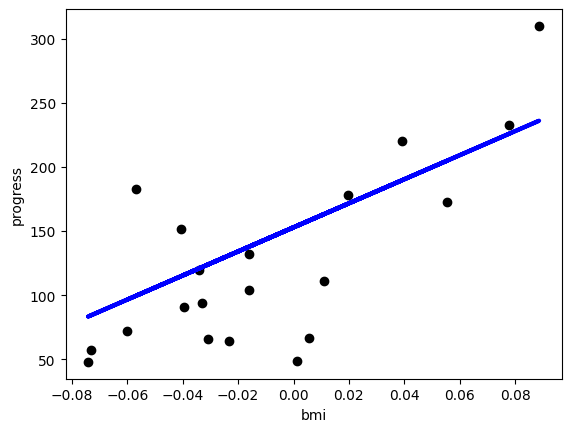

결정계수 : 0.47


In [41]:
# Use only one feature
diabetes_x = df_diab['bmi'].values.reshape(-1,1)

# train / test data set 분할
diabetes_x_train = diabetes_x[:-20]
diabetes_x_test = diabetes_x[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# sklearn model 이용
regr = linear_model.LinearRegression()

regr.fit(diabetes_x_train, diabetes_y_train)
print(regr.coef_, regr.intercept_) # 기울기 / 절편
# set_config(print_changed_only = False)

y_pred =regr.predict(diabetes_x_test)# 예측

# visualization
plt.scatter (diabetes_x_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_x_test, y_pred, color='blue', linewidth = 3)

plt.xlabel('bmi')
plt.ylabel('progress')
plt.show()

# r2 계산
print('결정계수 : {:.2f}'.format(r2_score(diabetes_y_test, y_pred)))

In [42]:
# 모든 feature 사용
diabetes_x = df_diab.values

diabetes_x_train = diabetes_x[:-20]
diabetes_x_test = diabetes_x[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_x_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_x_test)

print('결젱계수 : {:.2f}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))

결젱계수 : 0.59
